In [1]:
import pandas as pd

df = pd.read_csv("customer_churn_dataset-training-master.csv")

**KARAKTERISTIK DATA**

---



In [2]:
df.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [3]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [4]:
df.dtypes

,0
CustomerID,float64
Age,float64
Gender,object
Tenure,float64
Usage Frequency,float64
Support Calls,float64
Payment Delay,float64
Subscription Type,object
Contract Length,object
Total Spend,float64


In [5]:
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 440833
Jumlah kolom: 12


**PREPROCESSING DATA**

---



1\. Data Cleaning

a. Nilai Null

In [6]:
# Perulangan untuk melihat kolom yang memiliki nilai null, jumlah baris null di kolom tersebut, persentase null di kolom tersebut, dan nilai unik

df_count = len(df)
col_null = [col_name for col_name in df.columns if df[col_name].isnull().any()]

for column in col_null:
    nulls_count = df[column].isnull().sum()

    print("")
    print(f"-- Kolom {column} --")
    print("")
    print(f"Jumlah Null: {nulls_count}")
    print(f"Persentase Null: {nulls_count / df_count * 100:.2f}%")
    print(f"Nilai unik: {df[column].dropna().unique()}")
    print("")
    print("=====================================================")


-- Kolom CustomerID --

Jumlah Null: 1
Persentase Null: 0.00%
Nilai unik: [2.00000e+00 3.00000e+00 4.00000e+00 ... 4.49997e+05 4.49998e+05
 4.49999e+05]


-- Kolom Age --

Jumlah Null: 1
Persentase Null: 0.00%
Nilai unik: [30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62.]


-- Kolom Gender --

Jumlah Null: 1
Persentase Null: 0.00%
Nilai unik: ['Female' 'Male']


-- Kolom Tenure --

Jumlah Null: 1
Persentase Null: 0.00%
Nilai unik: [39. 49. 14. 38. 32. 33. 37. 12.  3. 18. 21. 41. 35.  4. 56. 44. 15. 55.
 43. 52. 26.  2. 29. 59. 40. 51. 53. 24. 30.  6. 28. 17. 60.  7. 34. 10.
  5. 45. 54. 58. 25. 13. 47. 31. 22. 19. 23.  1.  8. 46. 16. 50. 48. 11.
 42. 27.  9. 20. 57. 36.]


-- Kolom Usage Frequency --

Jumlah Null: 1
Persentase Null: 0.00%
Nilai unik: [14.  1.  4. 21. 20. 25. 12.  8.  5.  9.  6. 17. 23. 13. 16. 27.  2. 28.
 29. 15. 24.  3. 22.

In [7]:
# Melihat baris yang memiliki nilai null
df[df.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Menghapus nilai null
df = df.dropna()

In [9]:
# Memastikan nilai null sudah terhapus(1)
df[df.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [10]:
# Memastikan nilai null sudah terhapus(2)
print([col_name for col_name in df.columns if df[col_name].isnull().any()])

[]


In [11]:
# Memastikan nilai null sudah terhapus(3)
df.shape[0]

440832

b. Nilai Duplikat

In [12]:
# Melihat apakah ada data yang duplikat
grouped_df = df.groupby(df.columns.tolist()).size().reset_index(name='count')
filtered_df = grouped_df[grouped_df['count'] > 1]

filtered_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,count


c. Nilai Outlier

In [13]:
# Membagi dua list, data kategorikal dan data numerikal
categorical_col = df.select_dtypes(include=['object']).columns.tolist()
numerical_col = df.select_dtypes(include=['float']).columns.tolist()

print(f"Fitur Kategorikal: {categorical_col}")
print(f"Fitur Numerik: {numerical_col}")

Fitur Kategorikal: ['Gender', 'Subscription Type', 'Contract Length']
Fitur Numerik: ['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']


In [14]:
# Outlier Data Kategorikal
print("-- Nilai Unik --")
for column in categorical_col:
    print("")
    print(f"Kolom {column}: {df[column].drop_duplicates().tolist()}")

-- Nilai Unik --

Kolom Gender: ['Female', 'Male']

Kolom Subscription Type: ['Standard', 'Basic', 'Premium']

Kolom Contract Length: ['Annual', 'Monthly', 'Quarterly']


In [15]:
categorical_data = df[categorical_col]

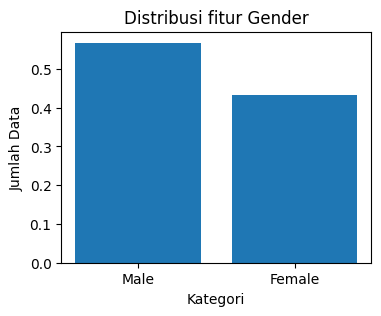

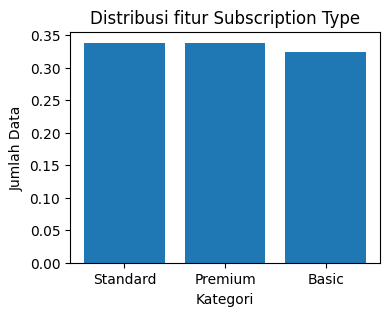

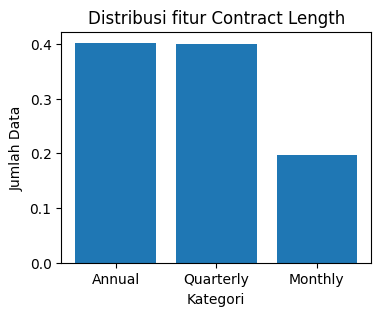

In [16]:
# Bar Plot
import matplotlib.pyplot as plt
import numpy as np

for column in categorical_data:
    value_counts = categorical_data[column].value_counts(normalize=True)

    plt.figure(figsize=(4, 3))
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f"Distribusi fitur {column}")
    plt.xlabel("Kategori")
    plt.ylabel("Jumlah Data")

In [17]:
# Outlier Data Numerik

print(f"-- Outlier --")
for column in numerical_col:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count = outliers.shape[0]

    print(f"")
    print(f"Kolom: {column}")
    print(f"Jumlah: {outliers_count}")
    print(f"Persentase: {outliers_count / df.shape[0] * 100}%")

-- Outlier --

Kolom: CustomerID
Jumlah: 0
Persentase: 0.0%

Kolom: Age
Jumlah: 0
Persentase: 0.0%

Kolom: Tenure
Jumlah: 0
Persentase: 0.0%

Kolom: Usage Frequency
Jumlah: 0
Persentase: 0.0%

Kolom: Support Calls
Jumlah: 0
Persentase: 0.0%

Kolom: Payment Delay
Jumlah: 0
Persentase: 0.0%

Kolom: Total Spend
Jumlah: 0
Persentase: 0.0%

Kolom: Last Interaction
Jumlah: 0
Persentase: 0.0%

Kolom: Churn
Jumlah: 0
Persentase: 0.0%


2\. Data Transformation

a. Data Kategorikal

In [18]:
categorical_data.head(5)

,Gender,Subscription Type,Contract Length
0,Female,Standard,Annual
1,Female,Basic,Monthly
2,Female,Basic,Quarterly
3,Male,Standard,Monthly
4,Male,Basic,Monthly


In [19]:
# Ordinal
ordinal_data = categorical_data[['Subscription Type', 'Contract Length']]
ordinal_data.head(5)

,Subscription Type,Contract Length
0,Standard,Annual
1,Basic,Monthly
2,Basic,Quarterly
3,Standard,Monthly
4,Basic,Monthly


In [20]:
for column in ordinal_data:
    print(f"Kolom {column}: {df[column].drop_duplicates().tolist()}")

Kolom Subscription Type: ['Standard', 'Basic', 'Premium']
Kolom Contract Length: ['Annual', 'Monthly', 'Quarterly']


In [21]:
# Mapping manual
ordinal_data['Subscription Type Index'] = ordinal_data['Subscription Type'].map({'Basic': 1, 'Standard': 2, 'Premium': 3})
ordinal_data['Contract Length Index'] = ordinal_data['Contract Length'].map({'Monthly': 1, 'Quarterly': 2, 'Annual': 3})

In [22]:
# Drop kolom lama
ordinal_data = ordinal_data.drop(columns=["Subscription Type", "Contract Length"])

In [23]:
# Buat id untuk menyatukan kembali data
ordinal_data['id'] = range(len(ordinal_data))

In [24]:
ordinal_data.head(5)

,Subscription Type Index,Contract Length Index,id
0,2,3,0
1,1,1,1
2,1,2,2
3,2,1,3
4,1,1,4


In [25]:
# Nominal
nominal_data = categorical_data[['Gender']]
nominal_data.head(5)

,Gender
0,Female
1,Female
2,Female
3,Male
4,Male


In [26]:
# Encoding
encoded_nominal = pd.get_dummies(nominal_data, columns=['Gender'], drop_first=False)

In [27]:
# Buat id untuk menyatukan kembali data
encoded_nominal['id'] = range(len(encoded_nominal))

In [28]:
# Mengubah tipe data hasil encoding dari boolean ke integer
encoded_nominal[['Gender_Female', 'Gender_Male']] = encoded_nominal[['Gender_Female', 'Gender_Male']].astype(int)

In [29]:
encoded_nominal.head(5)

,Gender_Female,Gender_Male,id
0,1,0,0
1,1,0,1
2,1,0,2
3,0,1,3
4,0,1,4


In [30]:
df['Gender'].value_counts()

,count
Gender,
Male,250252
Female,190580


b. Data Numerikal

In [31]:
numerical_data = df[numerical_col]

In [32]:
numerical_data.head(5)

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,2.0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0
1,3.0,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0
2,4.0,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0
3,5.0,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0
4,6.0,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0


In [33]:
df['Last Interaction'].nunique()

30

In [34]:
# Melihat distribusi data

for column in numerical_data:
    data = numerical_data[column]

    skewness = data.skew()
    print(f"Skewness kolom {column}: {skewness:.4f}")

Skewness kolom CustomerID: -0.0185
Skewness kolom Age: 0.1620
Skewness kolom Tenure: -0.0614
Skewness kolom Usage Frequency: -0.0435
Skewness kolom Support Calls: 0.6668
Skewness kolom Payment Delay: 0.2674
Skewness kolom Total Spend: -0.4572
Skewness kolom Last Interaction: 0.1768
Skewness kolom Churn: -0.2709


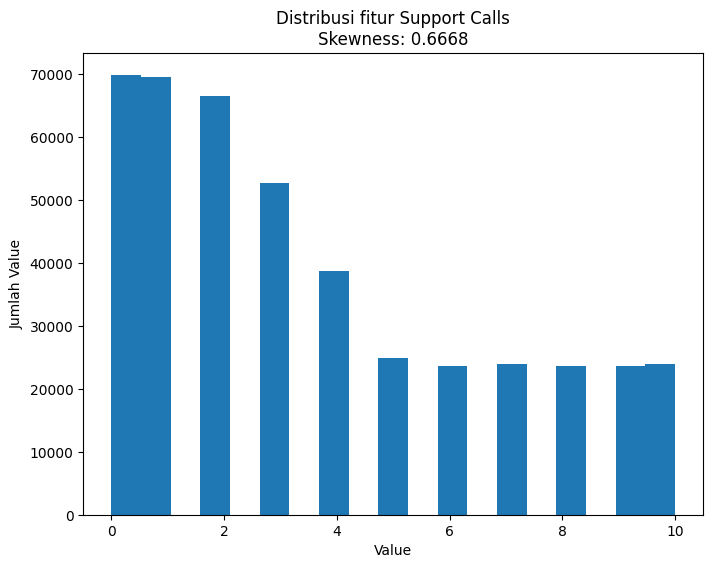

In [35]:
sc = numerical_data['Support Calls']

sc_skewness = sc.skew()
sturges_bin_sc = int(1 + np.log2(len(sc)))

plt.figure(figsize=(8, 6))
plt.hist(sc, bins=sturges_bin_sc)
plt.title(f"Distribusi fitur Support Calls\nSkewness: {sc_skewness:.4f}")
plt.xlabel("Value")
plt.ylabel("Jumlah Value")
plt.show()

In [36]:
# Transformasi Kolom Support Calls dengan Log Transform

numerical_data['Support Calls_Log'] = np.log1p(numerical_data['Support Calls'])

/tmp/ipython-input-36-4102368721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['Support Calls_Log'] = np.log1p(numerical_data['Support Calls'])


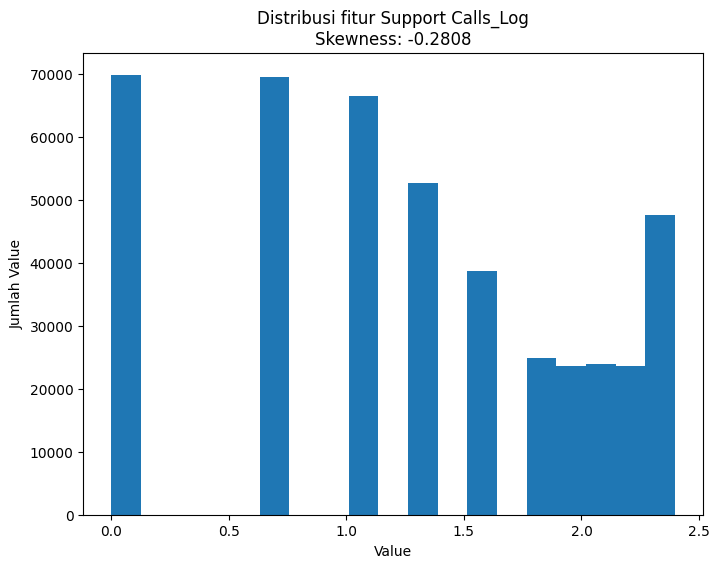

In [37]:
scl = numerical_data['Support Calls_Log']

scl_skewness = scl.skew()
sturges_bin_scl = int(1 + np.log2(len(scl)))

plt.figure(figsize=(8, 6))
plt.hist(scl, bins=sturges_bin_scl)
plt.title(f"Distribusi fitur Support Calls_Log\nSkewness: {scl_skewness:.4f}")
plt.xlabel("Value")
plt.ylabel("Jumlah Value")
plt.show()

In [38]:
numerical_data = numerical_data.drop("Support Calls", axis=1)

In [39]:
numerical_data.head(5)

,CustomerID,Age,Tenure,Usage Frequency,Payment Delay,Total Spend,Last Interaction,Churn,Support Calls_Log
0,2.0,30.0,39.0,14.0,18.0,932.0,17.0,1.0,1.791759
1,3.0,65.0,49.0,1.0,8.0,557.0,6.0,1.0,2.397895
2,4.0,55.0,14.0,4.0,18.0,185.0,3.0,1.0,1.945910
3,5.0,58.0,38.0,21.0,7.0,396.0,29.0,1.0,2.079442
4,6.0,23.0,32.0,20.0,8.0,617.0,20.0,1.0,1.791759


In [40]:
# Buat id untuk menyatukan kembali data
numerical_data['id'] = range(len(numerical_data))

3\. Data Normalization

In [41]:
# Menyatukan data kategorik ordinal dengan data numerik

data_normalized = numerical_data.merge(ordinal_data, on="id")
data_normalized = data_normalized.drop("id", axis=1)

In [42]:
data_normalized.head(5)

,CustomerID,Age,Tenure,Usage Frequency,Payment Delay,Total Spend,Last Interaction,Churn,Support Calls_Log,Subscription Type Index,Contract Length Index
0,2.0,30.0,39.0,14.0,18.0,932.0,17.0,1.0,1.791759,2,3
1,3.0,65.0,49.0,1.0,8.0,557.0,6.0,1.0,2.397895,1,1
2,4.0,55.0,14.0,4.0,18.0,185.0,3.0,1.0,1.945910,1,2
3,5.0,58.0,38.0,21.0,7.0,396.0,29.0,1.0,2.079442,2,1
4,6.0,23.0,32.0,20.0,8.0,617.0,20.0,1.0,1.791759,1,1


In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns = data_normalized.columns

data_normalized = scaler.fit_transform(data_normalized)

data_normalized = pd.DataFrame(data_normalized, columns=columns)

In [44]:
data_normalized.head(5)

,CustomerID,Age,Tenure,Usage Frequency,Payment Delay,Total Spend,Last Interaction,Churn,Support Calls_Log,Subscription Type Index,Contract Length Index
0,0.000000,0.255319,0.644068,0.448276,0.600000,0.924444,0.551724,1.0,0.747222,0.5,1.0
1,0.000002,1.000000,0.813559,0.000000,0.266667,0.507778,0.172414,1.0,1.000000,0.0,0.0
2,0.000004,0.787234,0.220339,0.103448,0.600000,0.094444,0.068966,1.0,0.811508,0.0,0.5
3,0.000007,0.851064,0.627119,0.689655,0.233333,0.328889,0.965517,1.0,0.867194,0.5,0.0
4,0.000009,0.106383,0.525424,0.655172,0.266667,0.574444,0.655172,1.0,0.747222,0.0,0.0


In [45]:
# Buat id untuk menyatukan kembali data
data_normalized['id'] = range(len(data_normalized))

In [46]:
# Menyatukan lagi semua data

final_data = data_normalized.merge(encoded_nominal, on="id")

final_data = final_data.drop("id", axis=1)

In [47]:
final_data.head(5)

,CustomerID,Age,Tenure,Usage Frequency,Payment Delay,Total Spend,Last Interaction,Churn,Support Calls_Log,Subscription Type Index,Contract Length Index,Gender_Female,Gender_Male
0,0.000000,0.255319,0.644068,0.448276,0.600000,0.924444,0.551724,1.0,0.747222,0.5,1.0,1,0
1,0.000002,1.000000,0.813559,0.000000,0.266667,0.507778,0.172414,1.0,1.000000,0.0,0.0,1,0
2,0.000004,0.787234,0.220339,0.103448,0.600000,0.094444,0.068966,1.0,0.811508,0.0,0.5,1,0
3,0.000007,0.851064,0.627119,0.689655,0.233333,0.328889,0.965517,1.0,0.867194,0.5,0.0,0,1
4,0.000009,0.106383,0.525424,0.655172,0.266667,0.574444,0.655172,1.0,0.747222,0.0,0.0,0,1


**EXPLORATORY DATA ANALYSIS**

---


In [48]:
# Drop CustomerID, Gender_Female, dan Gender_Male karena merupakan fitur yang tidak relevan

final_data = final_data.drop(columns=['CustomerID', 'Gender_Female', 'Gender_Male'])

In [49]:
final_data.head(5)

,Age,Tenure,Usage Frequency,Payment Delay,Total Spend,Last Interaction,Churn,Support Calls_Log,Subscription Type Index,Contract Length Index
0,0.255319,0.644068,0.448276,0.600000,0.924444,0.551724,1.0,0.747222,0.5,1.0
1,1.000000,0.813559,0.000000,0.266667,0.507778,0.172414,1.0,1.000000,0.0,0.0
2,0.787234,0.220339,0.103448,0.600000,0.094444,0.068966,1.0,0.811508,0.0,0.5
3,0.851064,0.627119,0.689655,0.233333,0.328889,0.965517,1.0,0.867194,0.5,0.0
4,0.106383,0.525424,0.655172,0.266667,0.574444,0.655172,1.0,0.747222,0.0,0.0


In [50]:
target_col = 'Churn'
feature_cols = final_data.columns.drop(target_col).tolist()

1\. Korelasi Terhadap Target

Point Biserial Correlation

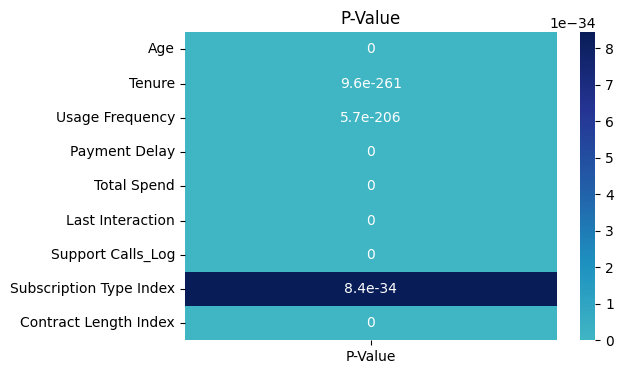

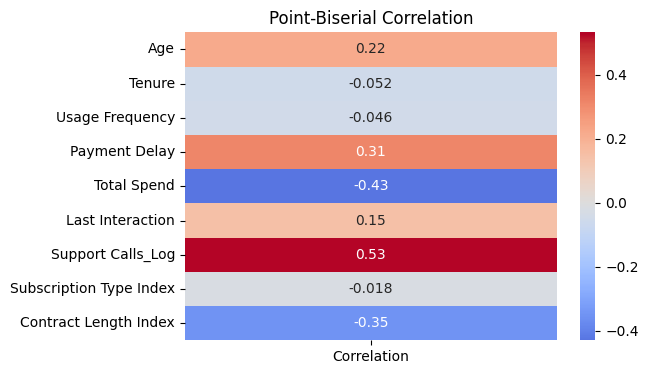

In [51]:
from scipy.stats import pointbiserialr
import seaborn as sns

corr_matrix = pd.DataFrame(index=feature_cols, columns=['Correlation'])
pval_matrix = pd.DataFrame(index=feature_cols, columns=['P-Value'])

for col in feature_cols:
    corr, pval = pointbiserialr(final_data[col], final_data[target_col])
    corr_matrix.loc[col, 'Correlation'] = corr
    pval_matrix.loc[col, 'P-Value'] = pval

corr_matrix = corr_matrix.astype(float)
pval_matrix = pval_matrix.astype(float)

plt.figure(figsize=(6, 4))
sns.heatmap(pval_matrix, annot=True, cmap='YlGnBu', center=0)
plt.title("P-Value")
plt.show()
print("")
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Point-Biserial Correlation")
plt.show()

2\. Distribusi Data

In [52]:
for column in final_data:
    data = final_data[column]

    skewness = data.skew()
    print(f"Skewness kolom {column}: {skewness:.4f}")

Skewness kolom Age: 0.1620
Skewness kolom Tenure: -0.0614
Skewness kolom Usage Frequency: -0.0435
Skewness kolom Payment Delay: 0.2674
Skewness kolom Total Spend: -0.4572
Skewness kolom Last Interaction: 0.1768
Skewness kolom Churn: -0.2709
Skewness kolom Support Calls_Log: -0.2808
Skewness kolom Subscription Type Index: -0.0235
Skewness kolom Contract Length Index: -0.3508


 3\. Interaksi antar Fitur

In [53]:
features = final_data[feature_cols]

Pearson Correlation

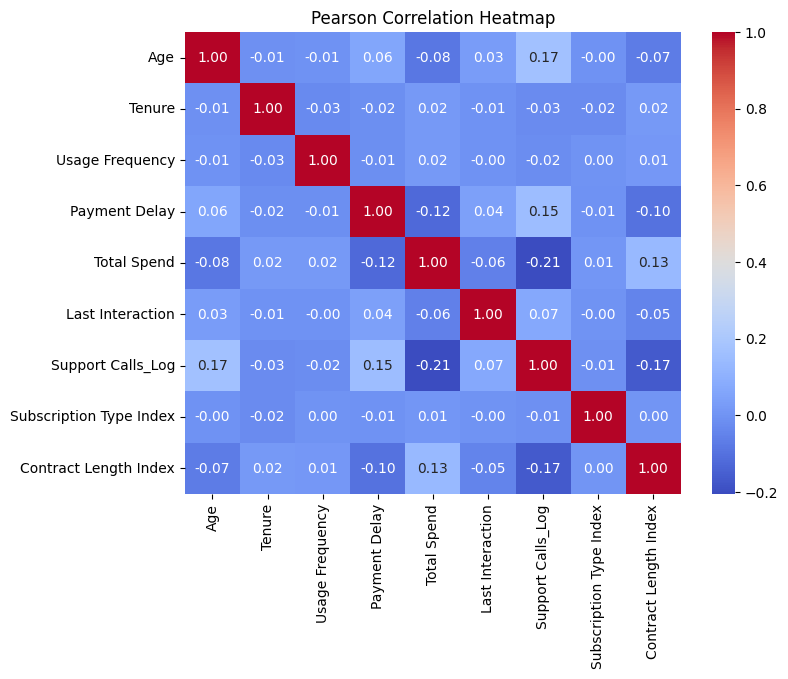

In [54]:
from scipy.stats import pearsonr

pearson_corr = features.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

Spearman Correlation

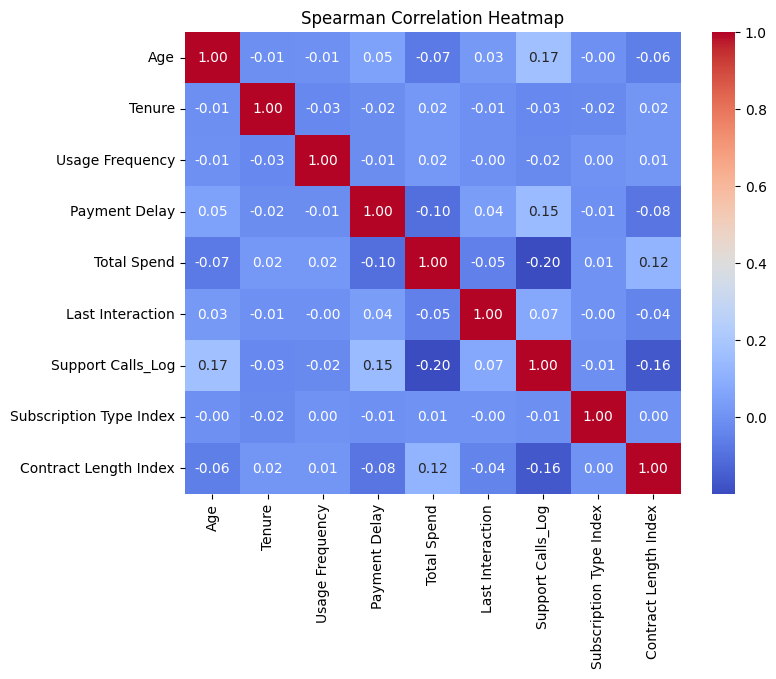

In [55]:
spearman_corr = features.corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

**FEATURE SELECTION**

---


In [56]:
# Drop kolom Subscription Type Index, Usage Frequency, Tenure, dan Last Interaction karena korelasi dengan Churn kecil
# Tersisa kolom Age, Support Calls, Payment Delay, Total Spend, Contract Length Index, dan Churn

selected_data = final_data[['Age', 'Support Calls_Log', 'Payment Delay', 'Total Spend', 'Contract Length Index', 'Churn']]
selected_data.head(5)

,Age,Support Calls_Log,Payment Delay,Total Spend,Contract Length Index,Churn
0,0.255319,0.747222,0.600000,0.924444,1.0,1.0
1,1.000000,1.000000,0.266667,0.507778,0.0,1.0
2,0.787234,0.811508,0.600000,0.094444,0.5,1.0
3,0.851064,0.867194,0.233333,0.328889,0.0,1.0
4,0.106383,0.747222,0.266667,0.574444,0.0,1.0


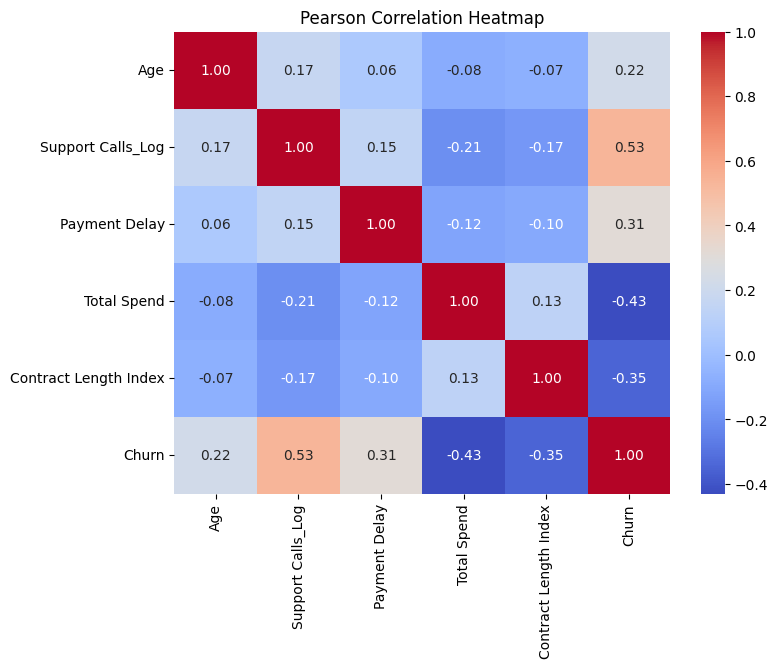

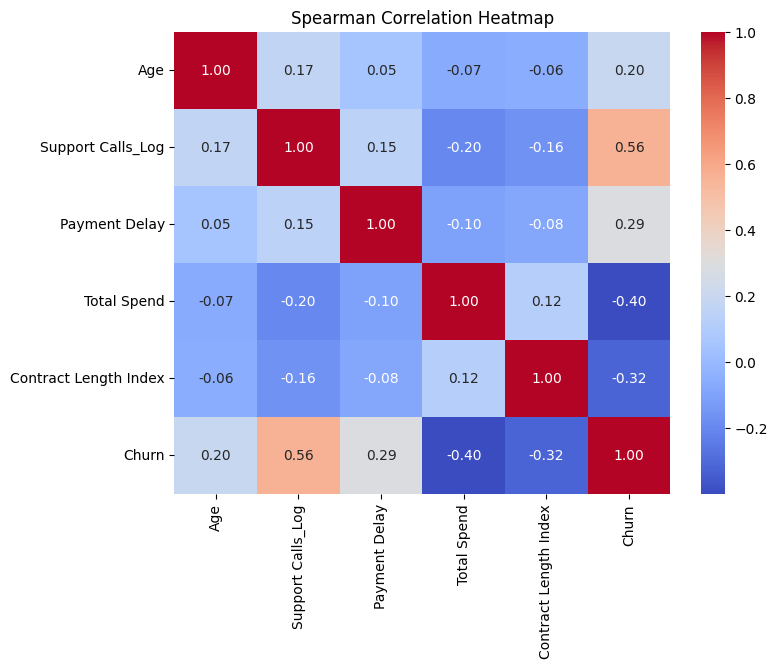

In [57]:
# Melihat korelasi antar fitur yang terseleksi

from scipy.stats import pearsonr

pearson_corr_selected = selected_data.corr(method='pearson')
spearman_corr_selected = selected_data.corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()
print("")
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

In [58]:
# Menmbagi data jadi feature dan target

selected_features = selected_data.drop(columns=['Churn'])

selected_features.head(5)

,Age,Support Calls_Log,Payment Delay,Total Spend,Contract Length Index
0,0.255319,0.747222,0.600000,0.924444,1.0
1,1.000000,1.000000,0.266667,0.507778,0.0
2,0.787234,0.811508,0.600000,0.094444,0.5
3,0.851064,0.867194,0.233333,0.328889,0.0
4,0.106383,0.747222,0.266667,0.574444,0.0


In [59]:
selected_target = selected_data['Churn']

selected_target.head(5)

,Churn
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [60]:
selected_features.dtypes

,0
Age,float64
Support Calls_Log,float64
Payment Delay,float64
Total Spend,float64
Contract Length Index,float64


In [61]:
selected_features.rename(columns={
    "Support Calls_Log": "Support Calls",
    "Contract Length Index": "Contract Length"
}, inplace=True)

In [62]:
selected_features.head(5)

,Age,Support Calls,Payment Delay,Total Spend,Contract Length
0,0.255319,0.747222,0.600000,0.924444,1.0
1,1.000000,1.000000,0.266667,0.507778,0.0
2,0.787234,0.811508,0.600000,0.094444,0.5
3,0.851064,0.867194,0.233333,0.328889,0.0
4,0.106383,0.747222,0.266667,0.574444,0.0


In [63]:
# Memastikan ada tidaknya multikolinearitas dg Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_const = add_constant(selected_features)

vif_df = pd.DataFrame()
vif_df["Feature"] = X_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_df)

           Feature        VIF
0            const  18.819246
1              Age   1.035219
2    Support Calls   1.105288
3    Payment Delay   1.037621
4      Total Spend   1.065253
5  Contract Length   1.045619


**MODELLING & EVALUATION**

---


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import joblib

X = selected_features
y = selected_target

In [65]:
print("Distribusi Target:\n")
print(y.value_counts(normalize=True))

Distribusi Target:

Churn
1.0    0.567107
0.0    0.432893
Name: proportion, dtype: float64


1\. K-Fold

In [66]:
baseline_model = RandomForestClassifier(n_estimators=100, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'Accuracy': 'accuracy',
    'Precision': 'precision_macro',
    'Recall': 'recall_macro'
}

baseline_cv_result = cross_validate(baseline_model, X, y, cv=cv, scoring=scoring)

print("Hasil K-Fold Evaluation:\n")
for metric in scoring.keys():
    scores = baseline_cv_result[f'test_{metric}']
    print(f"{metric}: mean = {np.mean(scores):.4f}, std = {np.std(scores):.4f}")

Hasil K-Fold Evaluation:

Accuracy: mean = 0.9871, std = 0.0004
Precision: mean = 0.9857, std = 0.0004
Recall: mean = 0.9883, std = 0.0003


2\. Cek Overfit/Underfit

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

baseline_model.fit(x_train, y_train)
y_pred = baseline_model.predict(x_test)

print("Evaluasi di Test Set:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

train_acc = accuracy_score(y_train, baseline_model.predict(x_train))
test_acc = accuracy_score(y_test, y_pred)
print(f"\nPerbandingan Akurasi:\nTrain: {train_acc:.4f}, Test: {test_acc:.4f}")


Evaluasi di Test Set:

Accuracy: 0.9868998604920208
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     38167
         1.0       1.00      0.98      0.99     50000

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167

Confusion Matrix:
 [[38075    92]
 [ 1063 48937]]

Perbandingan Akurasi:
Train: 0.9999, Test: 0.9869


3\. Feature Importance dari Random Forest

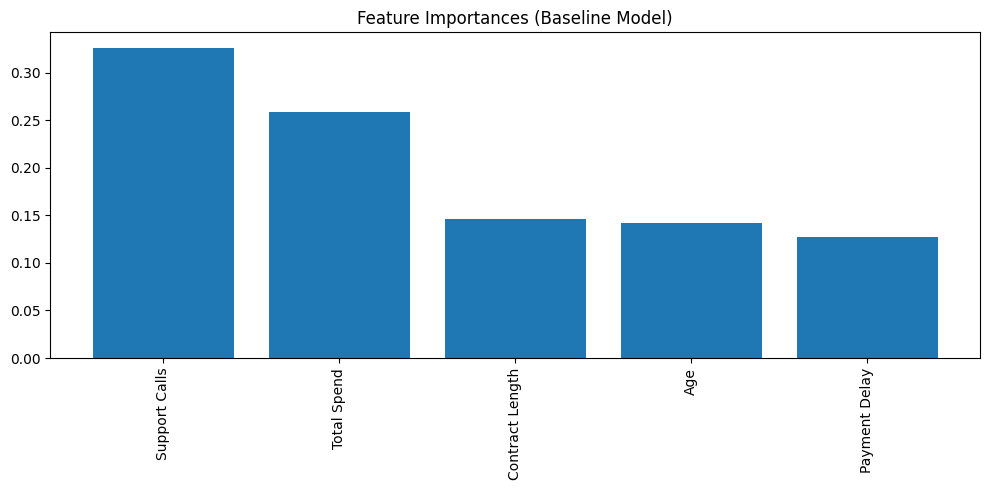

In [68]:
importances = baseline_model.feature_importances_
feat_names = X.columns if hasattr(X, 'columns') else [f'F{i}' for i in range(X.shape[1])]
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances (Baseline Model)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feat_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = final_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:\n", accuracy_score(y_test, y_pred))
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print(f"Confusion Matriks:\n\n{cm}")

Accuracy:
 0.9870019395011739
Classification Report:

               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     38063
         1.0       1.00      0.98      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167

Confusion Matriks:

[[37973    90]
 [ 1056 49048]]


In [71]:
import joblib

joblib.dump(final_model, "model.pkl")
print("Model saved!")

Model saved!


In [72]:
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved!")

Scaler saved!


**SKENARIO PENGUJIAN**

In [ ]:
x_test.describe()

,Age,Support Calls_Log,Payment Delay,Total Spend,Contract Length Index
count,88167.000000,88167.000000,88167.000000,88167.000000,88167.000000
mean,0.455628,0.530680,0.431764,0.590824,0.602884
std,0.264730,0.315375,0.275353,0.267249,0.374408
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234043,0.289065,0.200000,0.422328,0.500000
50%,0.446809,0.578130,0.400000,0.623333,0.500000
75%,0.638298,0.811508,0.633333,0.810833,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


1\. Skenario Normal Case

In [ ]:
# Cari baris data yang paling mendekati mean (paling normal)
from numpy.linalg import norm

means = x_test.mean()
distance_from_mean = x_test.apply(lambda row: norm(row - means), axis=1)
closest_indices = distance_from_mean.nsmallest(5).index

normal_cases = x_test.loc[closest_indices]
normal_labels = y_test.loc[closest_indices]

print("Normal Cases:\n", normal_cases)
print("\nLabel Asli:\n", normal_labels.tolist())

Normal Cases:
              Age  Support Calls_Log  Payment Delay  Total Spend  \
300558  0.446809            0.57813       0.433333     0.585800   
321148  0.446809            0.57813       0.433333     0.568811   
408594  0.425532            0.57813       0.433333     0.598867   
438401  0.468085            0.57813       0.466667     0.576689   
307189  0.468085            0.57813       0.400000     0.618078   

        Contract Length Index  
300558                    0.5  
321148                    0.5  
408594                    0.5  
438401                    0.5  
307189                    0.5  

Label Asli:
 [0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
normal_preds = final_model.predict(normal_cases)
normal_probs = final_model.predict_proba(normal_cases)

for i in range(len(normal_cases)):
    print(f"Index: {normal_cases.index[i]}\n")
    print("Label Asli:", "Churn" if normal_labels.iloc[i] == 1.0 else "Not Churn")
    print("Prediksi  :", "Churn" if normal_preds[i] == 1.0 else "Not Churn")
    print(f"Probabilitas → Not Churn: {normal_probs[i][0]:.2}, Churn: {normal_probs[i][1]:.2}")
    print("-" * 50)

Index: 300558

Label Asli: Not Churn
Prediksi  : Not Churn
Probabilitas → Not Churn: 1.0, Churn: 0.0
--------------------------------------------------
Index: 321148

Label Asli: Not Churn
Prediksi  : Not Churn
Probabilitas → Not Churn: 0.99, Churn: 0.01
--------------------------------------------------
Index: 408594

Label Asli: Not Churn
Prediksi  : Not Churn
Probabilitas → Not Churn: 1.0, Churn: 0.0
--------------------------------------------------
Index: 438401

Label Asli: Not Churn
Prediksi  : Not Churn
Probabilitas → Not Churn: 0.99, Churn: 0.01
--------------------------------------------------
Index: 307189

Label Asli: Not Churn
Prediksi  : Not Churn
Probabilitas → Not Churn: 0.96, Churn: 0.04
--------------------------------------------------


2\. Skenario Edge Case

In [ ]:
edge_indices = distance_from_mean.nlargest(5).index

edge_cases = x_test.loc[edge_indices]
edge_labels = y_test.loc[edge_indices]

print("Edge Cases:\n", edge_cases)
print("\nLabel Asli:\n", edge_labels.tolist())

Edge Cases:
              Age  Support Calls_Log  Payment Delay  Total Spend  \
195038  0.021277                0.0       0.966667     0.024444   
228403  0.106383                0.0       1.000000     0.030089   
3619    1.000000                0.0       0.000000     0.065556   
168428  0.978723                1.0       0.000000     0.003333   
206326  0.000000                0.0       0.900000     0.036311   

        Contract Length Index  
195038                    0.0  
228403                    0.0  
3619                      0.0  
168428                    0.0  
206326                    0.0  

Label Asli:
 [1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
edge_preds = final_model.predict(edge_cases)
edge_probs = final_model.predict_proba(edge_cases)

for i in range(len(edge_cases)):
    print(f"Index: {edge_cases.index[i]}\n")
    print("Label Asli:", "Churn" if edge_labels.iloc[i] == 1.0 else "Not Churn")
    print("Prediksi  :", "Churn" if edge_preds[i] == 1.0 else "Not Churn")
    print(f"Probabilitas → Not Churn: {edge_probs[i][0]:.2}, Churn: {edge_probs[i][1]:.2}")
    print("-" * 50)

Index: 195038

Label Asli: Churn
Prediksi  : Churn
Probabilitas → Not Churn: 0.0, Churn: 1.0
--------------------------------------------------
Index: 228403

Label Asli: Churn
Prediksi  : Churn
Probabilitas → Not Churn: 0.0, Churn: 1.0
--------------------------------------------------
Index: 3619

Label Asli: Churn
Prediksi  : Churn
Probabilitas → Not Churn: 0.0, Churn: 1.0
--------------------------------------------------
Index: 168428

Label Asli: Churn
Prediksi  : Churn
Probabilitas → Not Churn: 0.0, Churn: 1.0
--------------------------------------------------
Index: 206326

Label Asli: Churn
Prediksi  : Churn
Probabilitas → Not Churn: 0.0, Churn: 1.0
--------------------------------------------------


3\. Skenario Borderline Case

In [ ]:
probs = final_model.predict_proba(x_test)

conf_gap = np.abs(probs[:, 1] - 0.5)

borderline_indices = np.argsort(conf_gap)[:5]

borderline_cases = x_test.iloc[borderline_indices]
borderline_labels = y_test.iloc[borderline_indices]

borderline_preds = final_model.predict(borderline_cases)
borderline_probs = final_model.predict_proba(borderline_cases)

In [ ]:
borderline_preds = final_model.predict(borderline_cases)
borderline_probs = final_model.predict_proba(borderline_cases)

for i in range(len(borderline_cases)):
    print(f"Index: {borderline_cases.index[i]}\n")
    print("Label Asli:", "Churn" if borderline_labels.iloc[i] == 1.0 else "Not Churn")
    print("Prediksi  :", "Churn" if borderline_preds[i] == 1.0 else "Not Churn")
    print(f"Probabilitas → Not Churn: {borderline_probs[i][0]:.2}, Churn: {borderline_probs[i][1]:.2}")
    print("-" * 50)

Index: 354829

Label Asli: Not Churn
Prediksi  : Not Churn
Probabilitas → Not Churn: 0.5, Churn: 0.5
--------------------------------------------------
Index: 307729

Label Asli: Not Churn
Prediksi  : Not Churn
Probabilitas → Not Churn: 0.5, Churn: 0.5
--------------------------------------------------
Index: 340140

Label Asli: Not Churn
Prediksi  : Not Churn
Probabilitas → Not Churn: 0.5, Churn: 0.5
--------------------------------------------------
Index: 269298

Label Asli: Not Churn
Prediksi  : Not Churn
Probabilitas → Not Churn: 0.5, Churn: 0.5
--------------------------------------------------
Index: 298298

Label Asli: Not Churn
Prediksi  : Not Churn
Probabilitas → Not Churn: 0.5, Churn: 0.5
--------------------------------------------------
